In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
import pathlib
import pandas as pd
import torch
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision import transforms
from utilss import get_accuracy_train, get_accuracy_test, plot_curve, keep_store_dict, store_dict_to_disk
from data_loader import DataLoader1, ImageDataset
from initializers import gaussian_initializer, constant_initializer
from models import Model3, ModelM2, ModelM3, Model2, Model1, ModelAVE, Model
#from models1 import PoseEstimationModel
from test import test
from train import train

In [2]:
model1 = Model1()
model2 = Model2()
modelAVE = ModelAVE()
model2_M = ModelM2()
model3 = Model3()
model3_M = ModelM3()

In [3]:
model = Model(model1, model2, model3, modelAVE, model2_M, model3_M)
#model = model1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [4]:
num_epoch = 15
batch_size = 5
store_dict = dict()

In [5]:
dataset_test = ImageDataset("heat_maps_test_plain", "images_test", (368, 368), "hmi_test")
dataset_training = ImageDataset("heat_maps_training_one", "images_training_one", (368, 368), "hmi_training_one")
dataset_valid = ImageDataset("heat_maps_valid_plain", "images_valid", (368, 368), "hmi_valid")

In [6]:
loss_function = nn.MSELoss()
learning_rate = 0.1
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
# plt.figure(figsize = (5,5))
# image = dataset_valid[100][1][14]
# plt.imshow(image)

In [8]:
store_dict = train(model=model, num_epochs=num_epoch, train_loader=dataset_training, test_loader=dataset_valid, store_dict=store_dict, device = device, loss_function = loss_function, optimizer=optimizer, batch_size = batch_size)
store_dict_to_disk('store_dict.json', store_dict=store_dict)

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch: 1 | Loss: 0.2528 | Prec: 0.0000 | Rec: 0.0000
Epoch: 2 | Loss: 0.2516 | Prec: 0.0000 | Rec: 0.0000
Epoch: 3 | Loss: 0.2504 | Prec: 0.0000 | Rec: 0.0000
Epoch: 4 | Loss: 0.2491 | Prec: 0.0000 | Rec: 0.0000
Epoch: 5 | Loss: 0.2478 | Prec: 0.0000 | Rec: 0.0000
Epoch: 6 | Loss: 0.2466 | Prec: 0.0000 | Rec: 0.0000
Epoch: 7 | Loss: 0.2452 | Prec: 0.0000 | Rec: 0.0000
Epoch: 8 | Loss: 0.2439 | Prec: 0.0000 | Rec: 0.0000
Epoch: 9 | Loss: 0.2424 | Prec: 0.0000 | Rec: 0.0000
Epoch: 10 | Loss: 0.2409 | Prec: 0.0000 | Rec: 0.0000
Epoch: 11 | Loss: 0.2391 | Prec: 0.0000 | Rec: 0.0000
Epoch: 12 | Loss: 0.2370 | Prec: 0.0000 | Rec: 0.0000
Epoch: 13 | Loss: 0.2338 | Prec: 0.0000 | Rec: 0.0000
Epoch: 14 | Loss: 0.2280 | Prec: 0.0000 | Rec: 0.0000
Epoch: 15 | Loss: 0.2125 | Prec: 0.0357 | Rec: 0.0333


In [ ]:
torch.save(model,'/notebooks/lk-s-2024-detekcija-poze/model23_71.pth')

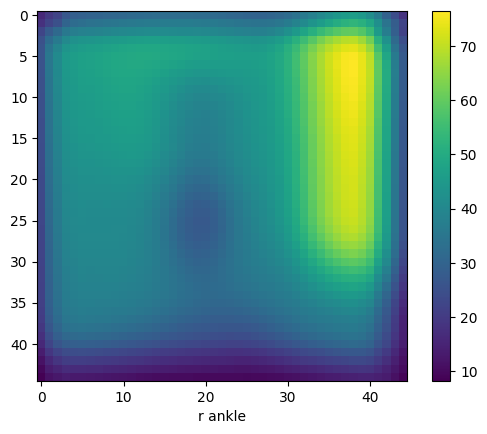

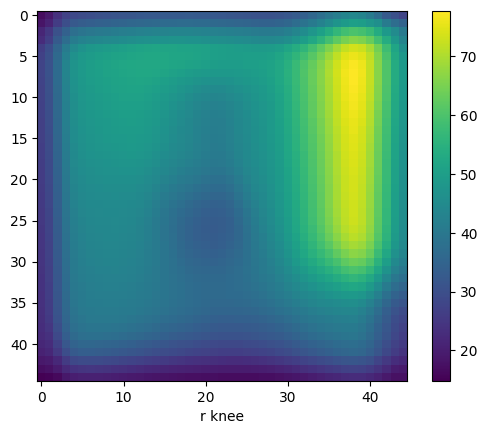

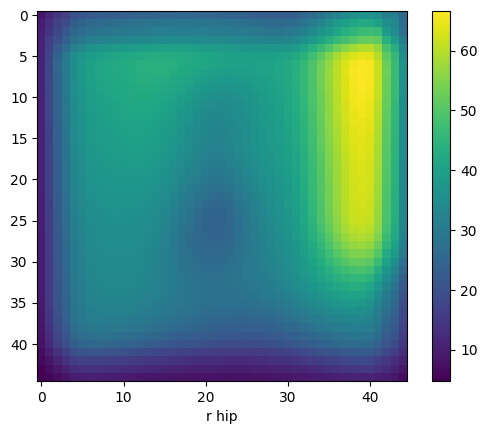

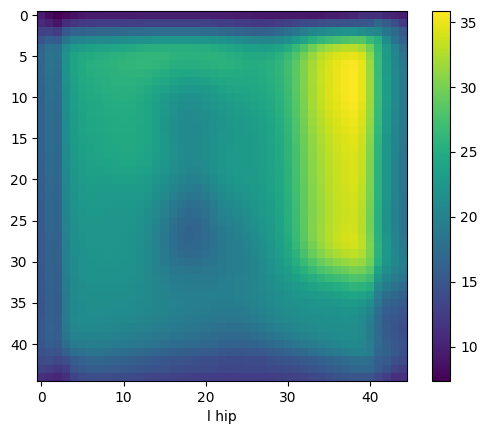

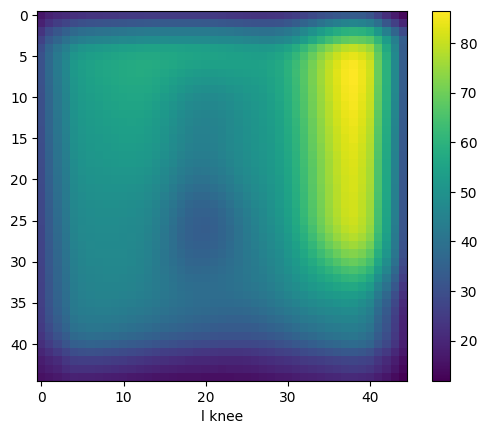

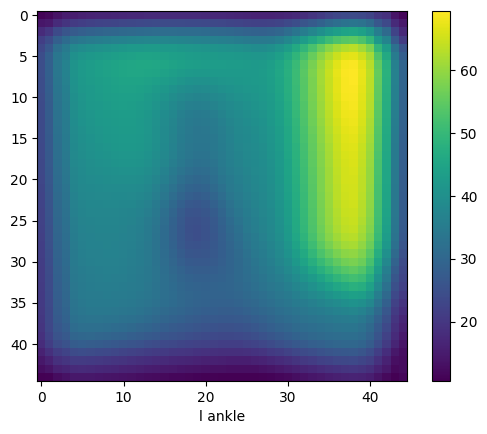

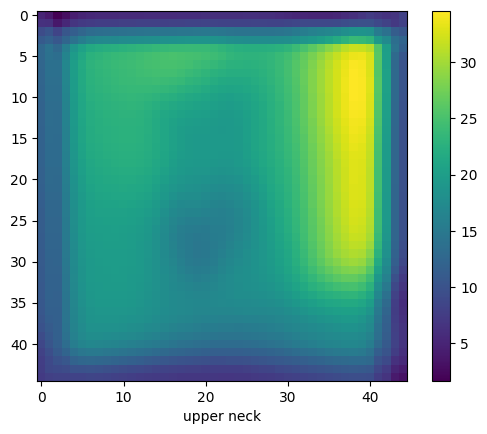

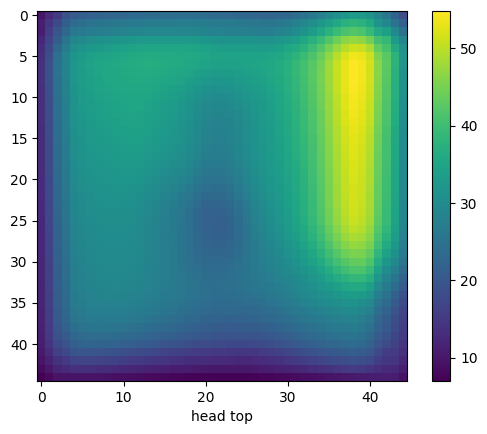

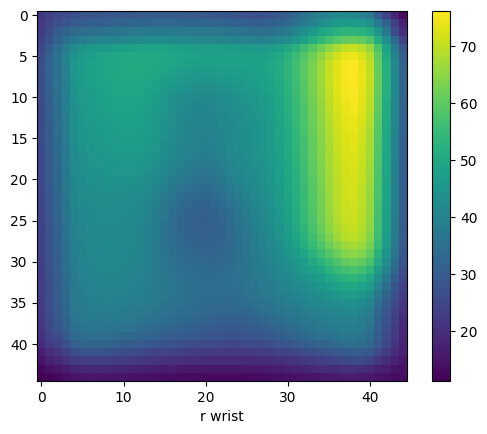

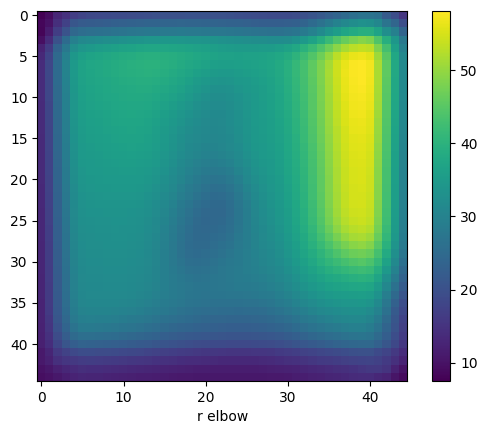

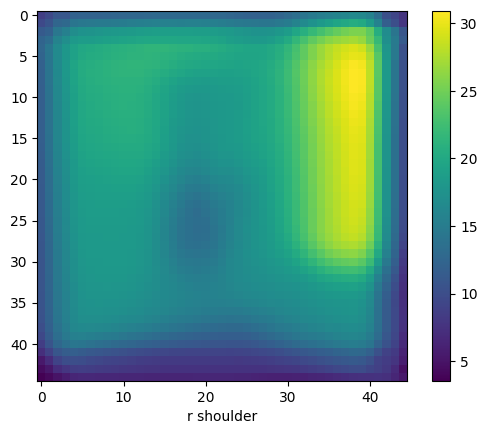

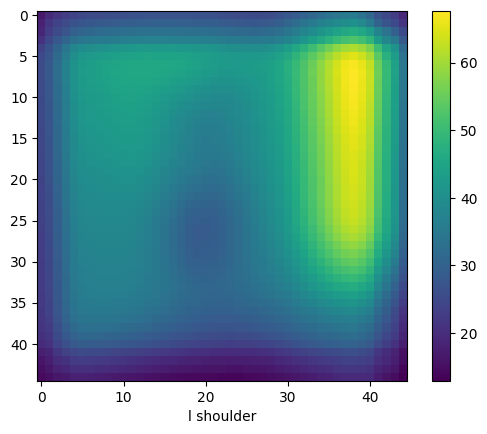

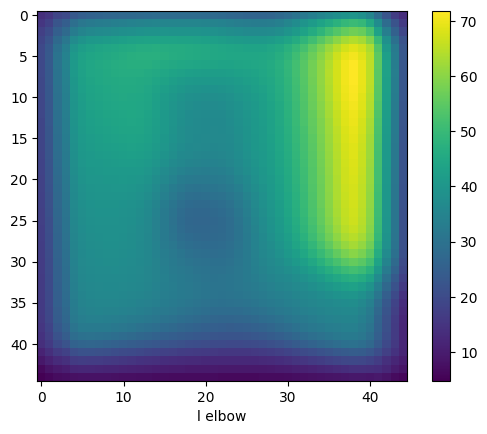

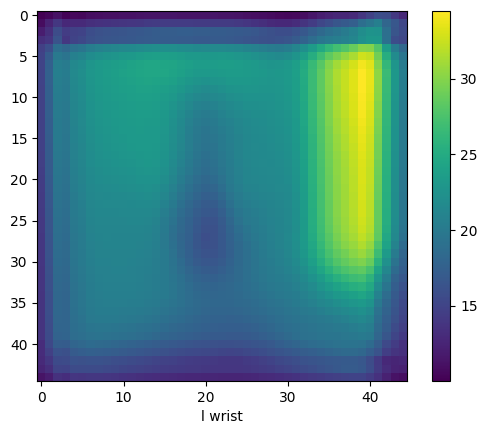

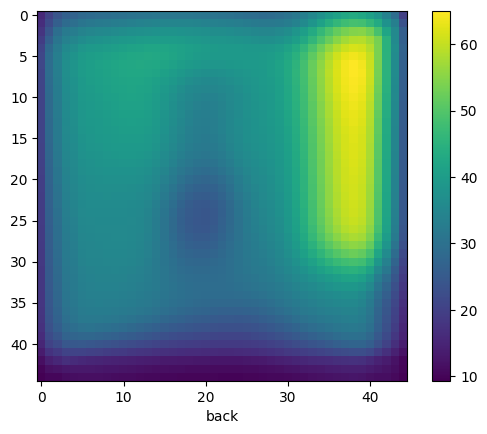

In [9]:
with torch.no_grad():
    loaded_model = model
    # loaded_model = torch.load('model23_71.pth')
    # loaded_model = loaded_model.eval()

    input1 = dataset_training[3]
    input2 = input1[2]
    input1 = input1[0]
    a = input1.detach().numpy()
    k = np.array([a, a, a, a, a])
    input1 = torch.Tensor(k)
    a = input2.detach().numpy()
    k = np.array([a, a, a, a, a])
    input2 = torch.Tensor(k)
    # input1a = input2.cpu()
    # image_to_display = np.transpose(input1a, (1, 2, 0))
    # plt.imshow(image_to_display)
    # plt.show()
    input1 = input1.to(device)
    input2 = input2.to(device)
    a = ['r ankle','r knee','r hip', 'l hip', 'l knee','l ankle','upper neck','head top','r wrist','r elbow', 'r shoulder', 'l shoulder','l elbow','l wrist', 'back']
    for i in range(5):
        for j in range(15):
            output = loaded_model(input1, input2)
            m = nn.Sigmoid()
            output = output.cpu()
            output/=-0.01
            #output = m(output)
            numpy_array = output.detach().numpy()
            plt.imshow(numpy_array[i][j])
            plt.xlabel(a[j])
            plt.colorbar()
            plt.show()
        break

In [ ]:
# input1 = dataset_training[7060][0]
# input1a = input1.cpu()
# image_to_display = np.transpose(input1a, (1, 2, 0))
# plt.imshow(image_to_display)
# plt.show()